In [1]:
from settings import *

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
from scipy.interpolate import CubicSpline

## 1. Import replication D_t

In [3]:
## Import
spline_p_rep = pd.read_csv('../lpps_replication/TPFILE',
                           sep=' ',
                           header=None)

## Clean
spline_p_rep.dropna(axis=1,
                    how='all',
                    inplace=True)

## Label indices
spline_p_rep.columns = range(1,261)
spline_p_rep.index = pd.date_range(start='2003-1-31',
                                   end='2010-2-28',
                                   freq='M')

In [4]:
spline_p_rep.shape

(86, 260)

In [5]:
spline_p_rep.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260
2009-10-31,0.999990,0.999976,0.999965,0.999958,0.999952,0.999947,0.999943,0.999938,0.999931,0.999922,0.999910,0.999894,0.999873,0.999847,0.999815,0.999778,0.999736,0.999690,0.999639,0.999585,0.999526,0.999465,0.999400,0.999332,0.999262,0.999189,0.999114,0.999038,0.998958,0.998877,0.998793,0.998707,0.998618,0.998527,0.998433,0.998336,0.998235,0.998132,0.998026,0.997916,0.997803,0.997686,0.997566,0.997442,0.997315,0.997184,0.997048,0.996909,0.996765,0.996617,0.996465,0.996308,0.996147,0.995981,0.995811,0.995636,0.995457,0.995273,0.995085,0.994892,0.994695,0.994493,0.994287,0.994076,0.993861,0.993642,0.993418,0.993189,0.992957,0.992719,0.992478,0.992232,0.991982,0.991727,0.991468,0.991204,0.990937,0.990665,0.990388,0.990108,0.989823,0.989533,0.989240,0.988942,0.988640,0.988334,0.988024,0.987710,0.987392,0.987069,0.986743,0.986413,0.986078,0.985740,0.985397,0.985051,0.984701,0.984347,0.983989,0.983627,0.983262,0.982893,0.982519,0.982143,0.981762,0.981378,0.980990,0.980598,0.980203,0.979804,0.979402,0.978996,0.978586,0.978173,0.977756,0.977336,0.976912,0.976485,0.976054,0.975620,0.975183,0.974742,0.974297,0.973849,0.973398,0.972944,0.972486,0.972025,0.971560,0.971093,0.970622,0.970147,0.969670,0.969189,0.968705,0.968218,0.967728,0.967234,0.966738,0.966238,0.965736,0.965230,0.964721,0.964209,0.963694,0.963176,0.962655,0.962131,0.961604,0.961075,0.960542,0.960006,0.959468,0.958926,0.958382,0.957835,0.957285,0.956732,0.956177,0.955618,0.955057,0.954493,0.953927,0.953358,0.952786,0.952211,0.951634,0.951055,0.950472,0.949888,0.949300,0.948710,0.948118,0.947523,0.946926,0.946326,0.945724,0.945119,0.944512,0.943903,0.943291,0.942677,0.942061,0.941442,0.940822,0.940199,0.939573,0.938946,0.938316,0.937685,0.937051,0.936415,0.935777,0.935137,0.934495,0.933851,0.933205,0.932557,0.931907,0.931255,0.930601,0.929945,0.929288,0.928629,0.927967,0.927305,0.926640,0.925974,0.925305,0.924636,0.923964,0.923291,0.922616,0.921940,0.921262,0.920583,0.919902,0.919219,0.918536,0.917850,0.917164,0.916475,0.915786,0.915095,0.914403,0.913710,0.913015,0.912319,0.911622,0.910923,0.910224,0.909523,0.908821,0.908118,0.907415,0.906710,0.906004,0.905297,0.904589,0.903880,0.903170,0.902459,0.901747,0.901035,0.900322,0.899608,0.898893,0.898177,0.897461,0.896744,0.896026,0.895308,0.894589,0.893869,0.893149,0.892429,0.891708,0.890986,0.890264,0.889541
2009-11-30,0.999988,0.999972,0.999959,0.999949,0.999941,0.999934,0.999927,0.999920,0.999911,0.999900,0.999887,0.999870,0.999848,0.999821,0.999790,0.999754,0.999714,0.999670,0.999623,0.999574,0.999522,0.999468,0.999412,0.999355,0.999298,0.999240,0.999182,0.999123,0.999065,0.999006,0.998947,0.998887,0.998826,0.998764,0.998701,0.998636,0.998570,0.998503,0.998433,0.998362,0.998289,0.998213,0.998136,0.998055,0.997972,0.997886,0.997798,0.997706,0.997611,0.997512,0.997410,0.997305,0.997195,0.997082,0.996965,0.996844,0.996719,0.996590,0.996458,0.996322,0.996182,0.996038,0.995890,0.995739,0.995584,0.995425,0.995262,0.995096,0.994926,0.994752,0.994574,0.994393,0.994208,0.994019,0.993827,0.993630,0.993431,0.993227,0.9

## 2. Load data

In [6]:
data_y = pd.read_csv(directory_rawdata+'FRB_H15.csv')

data_y = data_y.iloc[5:].copy()

## Rename, maturity in weeks
d_col = {'Series Description':'date',
         'Market yield on U.S. Treasury securities at 1-month   constant maturity, quoted on investment basis':4,
         'Market yield on U.S. Treasury securities at 3-month   constant maturity, quoted on investment basis':13,
         'Market yield on U.S. Treasury securities at 6-month   constant maturity, quoted on investment basis':26,
         'Market yield on U.S. Treasury securities at 1-year   constant maturity, quoted on investment basis':52,
         'Market yield on U.S. Treasury securities at 2-year   constant maturity, quoted on investment basis':104,
         'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis':156,
         'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis':260,
         'Market yield on U.S. Treasury securities at 7-year   constant maturity, quoted on investment basis':364,
         'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on investment basis':520,
         'Market yield on U.S. Treasury securities at 20-year   constant maturity, quoted on investment basis':1040,
         'Market yield on U.S. Treasury securities at 30-year   constant maturity, quoted on investment basis':1560}

data_y.rename(columns=d_col,
              inplace=True)

## Datetime
data_y['date'] = pd.to_datetime(data_y['date'])

## NAs
data_y.replace({'ND':np.nan},
               inplace=True)

In [7]:
## Make long
data_y_long = pd.melt(data_y,
                      id_vars='date',
                      var_name='maturity',
                      value_name='yield')

## Units, yield in %/100
data_y_long['maturity'] = pd.to_numeric(data_y_long['maturity'])
data_y_long['yield'] = pd.to_numeric(data_y_long['yield'])/100.0

In [8]:
## maturity is in months, need to make it in years for the formula
## yield is annualized in %/100
def y_to_p(y,maturity):
    p = 1.0/((1.0+y)**(maturity/52))
    return(p)

data_y_long['price'] = data_y_long.apply(lambda x:
                                         y_to_p(y=x['yield'],
                                                maturity=x['maturity']),
                                         axis=1)

In [9]:
## Wide prices
data_p = data_y_long.pivot(index='date',
                           values='price',
                           columns='maturity')\
                    .reset_index()

## Month end
data_p.sort_values(['date'],
                   inplace=True)
data_p = data_p.set_index(['date'])\
               .resample('M')\
               .last()\
               .reset_index()

## Drop NA for spline
data_p.dropna(inplace=True)

In [10]:
def this_get_p_spline(this_date,this_p_data,maturities_data,maturities_spline):
    this_cs = CubicSpline(x=maturities_data,
                          y=this_p_data)
    this_p_spline = pd.DataFrame(this_cs(maturities_spline),
                                 columns=[this_date],
                                 index=maturities_spline)\
                      .T
    return(this_p_spline)

def get_p_spline(data_p,maturities_data,maturities_spline):

    ## Get to date, [prices data], for apply
    this_data = data_p.copy()
    this_data['prices_data'] = this_data.set_index('date')\
                                        [maturities_data]\
                                        .values\
                                        .tolist()
    this_data.drop(columns=maturities_data,
                   inplace=True)
    
    ## Spline apply
    this_data['results'] = this_data.apply(lambda x:
                                           this_get_p_spline(this_date=x['date'],
                                                             this_p_data=x['prices_data'],
                                                             maturities_data=maturities_data,
                                                             maturities_spline=maturities_spline),
                                           axis=1)
    results = pd.concat(this_data['results'].tolist(),
                        axis=0)
    
    ## Out
    return(results)
    

In [11]:
maturities_data = data_p.set_index('date').columns.tolist()
maturities_spline = range(1,261)

In [12]:
spline_p = get_p_spline(data_p=data_p,
                        maturities_data=maturities_data,
                        maturities_spline=maturities_spline)

In [13]:
spline_p.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260
2001-07-31,0.999273,0.998587,0.997907,0.997231,0.996561,0.995895,0.995234,0.994577,0.993923,0.993273,0.992626,0.991982,0.991341,0.990701,0.990064,0.989428,0.988793,0.988160,0.987527,0.986894,0.986262,0.985629,0.984996,0.984361,0.983726,0.983089,0.982450,0.981810,0.981167,0.980523,0.979877,0.979230,0.978580,0.977929,0.977276,0.976621,0.975964,0.975306,0.974646,0.973984,0.973320,0.972655,0.971988,0.971319,0.970648,0.969975,0.969301,0.968625,0.967947,0.967268,0.966587,0.965904,0.965219,0.964532,0.963844,0.963155,0.962463,0.961770,0.961075,0.960379,0.959680,0.958981,0.958279,0.957576,0.956872,0.956166,0.955458,0.954749,0.954038,0.953326,0.952612,0.951897,0.951180,0.950462,0.949743,0.949022,0.948299,0.947575,0.946850,0.946123,0.945395,0.944666,0.943935,0.943203,0.942470,0.941735,0.940999,0.940262,0.939523,0.938783,0.938042,0.937300,0.936557,0.935812,0.935066,0.934319,0.933571,0.932821,0.932071,0.931319,0.930566,0.929812,0.929057,0.928301,0.927544,0.926786,0.926027,0.925266,0.924505,0.923743,0.922979,0.922214,0.921449,0.920682,0.919914,0.919145,0.918375,0.917604,0.916832,0.916058,0.915284,0.914508,0.913731,0.912954,0.912175,0.911395,0.910613,0.909831,0.909048,0.908263,0.907477,0.906691,0.905903,0.905114,0.904323,0.903532,0.902739,0.901946,0.901151,0.900355,0.899558,0.898759,0.897960,0.897159,0.896357,0.895554,0.894750,0.893945,0.893138,0.892331,0.891522,0.890712,0.889900,0.889088,0.888274,0.887459,0.886643,0.885826,0.885008,0.884188,0.883368,0.882546,0.881723,0.880899,0.880074,0.879248,0.878421,0.877593,0.876764,0.875934,0.875103,0.874271,0.873439,0.872605,0.871771,0.870935,0.870099,0.869263,0.868425,0.867587,0.866747,0.865908,0.865067,0.864226,0.863384,0.862541,0.861698,0.860855,0.860010,0.859165,0.858320,0.857474,0.856627,0.855780,0.854933,0.854085,0.853237,0.852388,0.851539,0.850689,0.849840,0.848989,0.848139,0.847288,0.846437,0.845586,0.844734,0.843882,0.843030,0.842178,0.841326,0.840474,0.839621,0.838768,0.837916,0.837063,0.836210,0.835357,0.834504,0.833651,0.832798,0.831946,0.831093,0.830240,0.829388,0.828535,0.827683,0.826831,0.825979,0.825127,0.824276,0.823425,0.822574,0.821723,0.820873,0.820023,0.819173,0.818324,0.817475,0.816626,0.815778,0.814930,0.814083,0.813236,0.812390,0.811544,0.810699,0.809854,0.809010,0.808167,0.807324,0.806482,0.805640,0.804799,0.803959,0.803119,0.802281,0.801443,0.800605,0.799769
2001-08-31,0.999435,0.998759,0.998092,0.997431,0.996778,0.996131,0.995491,0.994856,0.994226,0.993601,0.992980,0.992362,0.991748,0.991137,0.990528,0.989921,0.989315,0.988710,0.988106,0.987502,0.986897,0.986291,0.985684,0.985075,0.984464,0.983850,0.983233,0.982612,0.981989,0.981362,0.980733,0.980101,0.979466,0.978829,0.978189,0.977546,0.976902,0.976255,0.975606,0.974955,0.974303,0.973648,0.972992,0.972334,0.971675,0.971014,0.970352,0.969688,0.969024,0.968358,0.967692,0.967024,0.966356,0.965688,0.965018,0.964348,0.963676,0.963004,0.962332,0.961658,0.960984,0.960308,0.959632,0.958955,0.958277,0.957598,0.956918,0.956237,0.955556,0.954873,0.954189,0.953505,0.952819,0.952132,0.951444,0.950756,0.950066,0.949375,0.9

In [14]:
spline_p.shape

(235, 260)

## 3. Out

In [18]:
spline_p.to_csv(directory_cleandata+'d_t.csv',
                index=False)

## 4. Compare with LPPS

In [19]:
spline_merged = pd.merge(left=spline_p,
                         right=spline_p_rep,
                         left_index=True,
                         right_index=True,
                         how='right',
                         suffixes=['_us','_them'])

In [20]:
spline_merged.shape

(86, 520)

In [21]:
spline_merged.head()

,1_us,2_us,3_us,4_us,5_us,6_us,7_us,8_us,9_us,10_us,11_us,12_us,13_us,14_us,15_us,16_us,17_us,18_us,19_us,20_us,21_us,22_us,23_us,24_us,25_us,26_us,27_us,28_us,29_us,30_us,31_us,32_us,33_us,34_us,35_us,36_us,37_us,38_us,39_us,40_us,41_us,42_us,43_us,44_us,45_us,46_us,47_us,48_us,49_us,50_us,51_us,52_us,53_us,54_us,55_us,56_us,57_us,58_us,59_us,60_us,61_us,62_us,63_us,64_us,65_us,66_us,67_us,68_us,69_us,70_us,71_us,72_us,73_us,74_us,75_us,76_us,77_us,78_us,79_us,80_us,81_us,82_us,83_us,84_us,85_us,86_us,87_us,88_us,89_us,90_us,91_us,92_us,93_us,94_us,95_us,96_us,97_us,98_us,99_us,100_us,101_us,102_us,103_us,104_us,105_us,106_us,107_us,108_us,109_us,110_us,111_us,112_us,113_us,114_us,115_us,116_us,117_us,118_us,119_us,120_us,121_us,122_us,123_us,124_us,125_us,126_us,127_us,128_us,129_us,130_us,131_us,132_us,133_us,134_us,135_us,136_us,137_us,138_us,139_us,140_us,141_us,142_us,143_us,144_us,145_us,146_us,147_us,148_us,149_us,150_us,151_us,152_us,153_us,154_us,155_us,156_us,157_us,158_us,159_us,160_us,161_us,162_us,163_us,164_us,165_us,166_us,167_us,168_us,169_us,170_us,171_us,172_us,173_us,174_us,175_us,176_us,177_us,178_us,179_us,180_us,181_us,182_us,183_us,184_us,185_us,186_us,187_us,188_us,189_us,190_us,191_us,192_us,193_us,194_us,195_us,196_us,197_us,198_us,199_us,200_us,201_us,202_us,203_us,204_us,205_us,206_us,207_us,208_us,209_us,210_us,211_us,212_us,213_us,214_us,215_us,216_us,217_us,218_us,219_us,220_us,221_us,222_us,223_us,224_us,225_us,226_us,227_us,228_us,229_us,230_us,231_us,232_us,233_us,234_us,235_us,236_us,237_us,238_us,239_us,240_us,241_us,242_us,243_us,244_us,245_us,246_us,247_us,248_us,249_us,250_us,...,11_them,12_them,13_them,14_them,15_them,16_them,17_them,18_them,19_them,20_them,21_them,22_them,23_them,24_them,25_them,26_them,27_them,28_them,29_them,30_them,31_them,32_them,33_them,34_them,35_them,36_them,37_them,38_them,39_them,40_them,41_them,42_them,43_them,44_them,45_them,46_them,47_them,48_them,49_them,50_them,51_them,52_them,53_them,54_them,55_them,56_them,57_them,58_them,59_them,60_them,61_them,62_them,63_them,64_them,65_them,66_them,67_them,68_them,69_them,70_them,71_them,72_them,73_them,74_them,75_them,76_them,77_them,78_them,79_them,80_them,81_them,82_them,83_them,84_them,85_them,86_them,87_them,88_them,89_them,90_them,91_them,92_them,93_them,94_them,95_them,96_them,97_them,98_them,99_them,100_them,101_them,102_them,103_them,104_them,105_them,106_them,107_them,108_them,109_them,110_them,111_them,112_them,113_them,114_them,115_them,116_them,117_them,118_them,119_them,120_them,121_them,122_them,123_them,124_them,125_them,126_them,127_them,128_them,129_them,130_them,131_them,132_them,133_them,134_them,135_them,136_them,137_them,138_them,139_them,140_them,141_them,142_them,143_them,144_them,145_them,146_them,147_them,148_them,149_them,150_them,151_them,152_them,153_them,154_them,155_them,156_them,157_them,158_them,159_them,160_them,161_them,162_them,163_them,164_them,165_them,166_them,167_them,168_them,169_them,170_them,171_them,172_them,173_them,174_them,175_them,176_them,177_them,178_them,179_them,180_them,181_them,182_them,183_them,184_them,185_them,186_them,187_them,188_them,189_them,190_them,191_them,192_them,193_them,194_them,195_them,196_them,197_them,198_them,199_them,200_them,201_them,202_them,203_them,204_them,205_them,206_them,207_them,208_them,209_them,210_them,211_them,212_them,213_them,214_them,215_them,216_them,217_them,218_them,219_them,220_them,221_them,222_them,223_them,224_them,225_them,226_them,227_them,228_them,229_them,230_them,231_them,232_them,233_them,234_them,235_them,236_them,237_them,238_them,239_them,240_them,241_them,242_them,243_them,244_them,245_them,246_them,247_them,248_them,249_them,250_them,251_them,252_them,253_them,254_them,255_them,256_them,257_them,258_them,259_them,260_them
2003-01-31,0.999803,0.999569,0.999337,0.999106,0.998876,0.998648,0.998421,0.998194,0.997969,0.997744,0.997520,0.997296,0.997072,0.996848,0.996623,0.996399,0.996174,0.995949,0.995722,0.995495,0

In [22]:
this_date = '2010-02-28'

In [23]:
maturities_spline

range(1, 261)

In [24]:
spline_merged[['1_us','1_them']].corr().values[0][1]

0.8421237528861233

In [25]:
list_cor = []
for i in maturities_spline:
    this_cor = spline_merged[[str(i)+'_us',str(i)+'_them']].corr().values[0][1]
    list_cor.append(this_cor)

In [26]:
pd_cor = pd.DataFrame(list_cor,
                      columns=['correlation'],
                      index=maturities_spline)

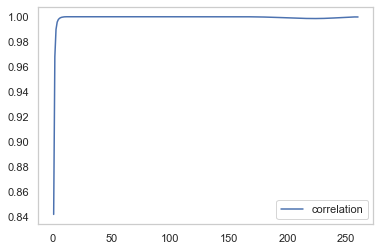

In [27]:
pd_cor.plot()

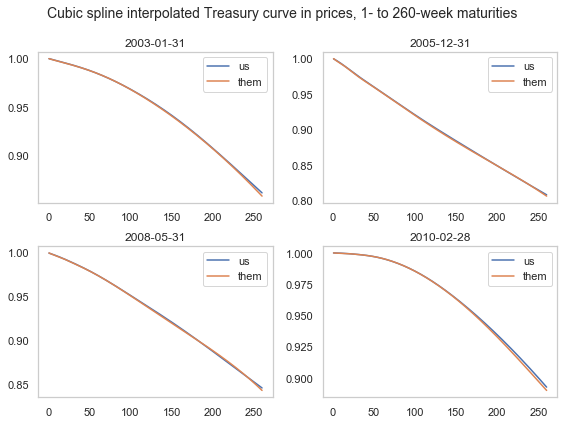

In [29]:
fig, ax = plt.subplots(figsize=(8,6),
                       nrows=2,
                       ncols=2)


this_date = '2003-01-31'
this_ax = ax[0][0]
spline_p.loc[this_date]\
        .plot(label='us',
              legend=True,
              ax=this_ax)
spline_p_rep.loc[this_date]\
            .plot(label='them',
                  legend=True,
                  ax=this_ax)
this_ax.set_title(this_date)

this_date = '2005-12-31'
this_ax = ax[0][1]
spline_p.loc[this_date]\
        .plot(label='us',
              legend=True,
              ax=this_ax)
spline_p_rep.loc[this_date]\
            .plot(label='them',
                  legend=True,
                  ax=this_ax)
this_ax.set_title(this_date)

this_date = '2008-05-31'
this_ax = ax[1][0]
spline_p.loc[this_date]\
        .plot(label='us',
              legend=True,
              ax=this_ax)
spline_p_rep.loc[this_date]\
            .plot(label='them',
                  legend=True,
                  ax=this_ax)
this_ax.set_title(this_date)

this_date = '2010-02-28'
this_ax = ax[1][1]
spline_p.loc[this_date]\
        .plot(label='us',
              legend=True,
              ax=this_ax)
spline_p_rep.loc[this_date]\
            .plot(label='them',
                  legend=True,
                  ax=this_ax)
this_ax.set_title(this_date)


fig.suptitle('Cubic spline interpolated Treasury curve in prices, 1- to 260-week maturities', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.875)
#plt.subplots_adjust(bottom=0.2)


plt.show()

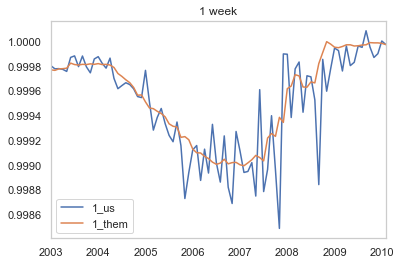

In [30]:
spline_merged[['1_us','1_them']].plot(title='1 week')

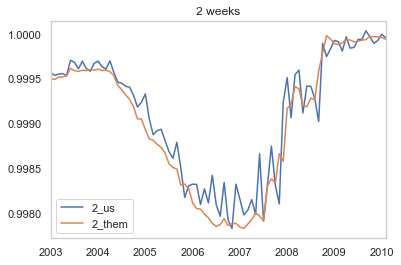

In [31]:
spline_merged[['2_us','2_them']].plot(title='2 weeks')

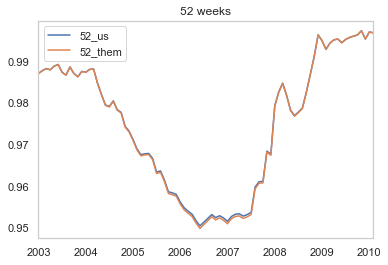

In [32]:
spline_merged[['52_us','52_them']].plot(title='52 weeks')